## **Trabalhando com Planilhas do Excel**

In [ ]:
#Importando a biblioteca pandas
import pandas as pd

In [ ]:
#Leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [ ]:
df5.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [ ]:
#Juntando todos os arquivos em um só
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
#Exibindo as cinco primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
#Exibindo as cinco últimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
#Como pegar uma amostra do conjunto de dados?
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
2,Salvador,2019-02-10,173.59,1035,3
11,Recife,2019-01-01,202.79,980,5
120,Fortaleza,2019-03-02,184.90,982,4
137,Recife,2019-03-02,51.99,983,3
98,Recife,2019-01-01,137.34,981,8


In [ ]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#Alterando o tipo de dado da coluna LojaID, transformando de número inteiro para object string.
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


### **Tratando Valores Faltantes**

In [ ]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
#Substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [ ]:
#Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [ ]:
#Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

##### **Criando Colunas Novas**

In [ ]:
#Criando a coluna de receita (Multiplicando vendas pela quantidade)
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
#Como achar a quantidade de produtos vendidos caso não tivesse. Dividir a receita pelas vendas (Valor do produto)
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [ ]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [ ]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [ ]:
#Vai retornar as 3 linhas com maiores receitas
#nlargest
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [ ]:
#Retornar as 3 piores receitas
#nsmallest
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [ ]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
#Ordenando o conjunto de dados pela receita - O ascending é falso para ele ordenar do maior para o menor
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


## **Trabalhando com Datas**

In [ ]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [ ]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [ ]:
#Transformando a coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [ ]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#Criando uma nova coluna com o ano
df["Ano Venda"] = df["Data"].dt.year

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano Venda
178,Natal,2019-01-02,39.28,1037,3,117.84,3.0,2019
79,Fortaleza,2019-01-01,41.25,1005,6,247.50,6.0,2019
66,Aracaju,2018-01-01,76.59,1523,4,306.36,4.0,2018
20,Fortaleza,2019-01-01,39.68,1003,2,79.36,2.0,2019
55,Aracaju,2018-01-01,67.23,1520,8,537.84,8.0,2018


In [ ]:
#Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano Venda,mes_venda,dia_venda
44,Fortaleza,2019-01-01,215.11,1003,1,215.11,1.0,2019,1,1
25,Fortaleza,2019-01-01,80.31,1004,4,321.24,4.0,2019,1,1
30,Natal,2018-10-02,856.00,853,4,3424.00,4.0,2018,10,2
77,Recife,2019-01-01,102.82,981,6,616.92,6.0,2019,1,1
58,Fortaleza,2019-01-01,38.90,1004,4,155.60,4.0,2019,1,1


In [ ]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano Venda,mes_venda,dia_venda,diferenca_dias
58,Aracaju,2018-01-01,37.14,1520,7,259.98,7.0,2018,1,1,0 days
129,Recife,2019-03-02,35.34,982,7,247.38,7.0,2019,3,2,425 days
182,Salvador,2019-01-02,6.60,1037,2,13.20,2.0,2019,1,2,366 days
117,Salvador,2019-03-02,39.41,1034,1,39.41,1.0,2019,3,2,425 days
128,Fortaleza,2019-03-02,38.70,982,4,154.80,4.0,2019,3,2,425 days


In [ ]:
#Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
80,Aracaju,2018-01-01,121.77,1523,3,365.31,3.0,2018,1,1,0 days,1
167,Natal,2019-01-02,36.42,1037,1,36.42,1.0,2019,1,2,366 days,1
27,Natal,2018-07-16,390.00,853,3,1170.00,3.0,2018,7,16,196 days,3
66,Natal,2019-03-24,559.00,853,2,1118.00,2.0,2019,3,24,447 days,1
69,Fortaleza,2019-01-01,216.65,1003,6,1299.90,6.0,2019,1,1,365 days,1


In [ ]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
119,Recife,2019-03-02,152.30,982,7,1066.10,7.0,2019,3,2,425 days,1
108,Salvador,2019-03-02,11.72,1037,1,11.72,1.0,2019,3,2,425 days,1
114,Recife,2019-03-02,16.82,983,4,67.28,4.0,2019,3,2,425 days,1
129,Salvador,2019-03-02,125.66,1037,1,125.66,1.0,2019,3,2,425 days,1
127,Fortaleza,2019-03-02,39.56,982,8,316.48,8.0,2019,3,2,425 days,1
121,Salvador,2019-03-02,100.70,1037,3,302.10,3.0,2019,3,2,425 days,1
120,Recife,2019-03-02,184.90,982,4,739.60,4.0,2019,3,2,425 days,1
130,Recife,2019-03-02,12.36,983,4,49.44,4.0,2019,3,2,425 days,1
128,Salvador,2019-03-02,36.84,1034,1,36.84,1.0,2019,3,2,425 days,1
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1


### **Visualização de Dados**

In [ ]:
#Verifica quantas linhas tem de cada LojaID - Exemplo: A Loja 1036 realizou 117 vendas
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

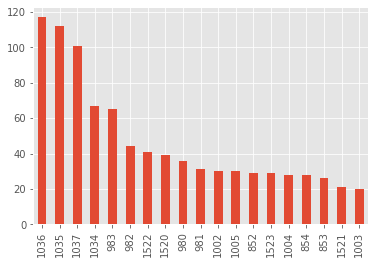

In [ ]:
#Gráfico de barras (A loja com a maior quantidade de vendas (linhas))
df["LojaID"].value_counts(ascending=False).plot.bar()

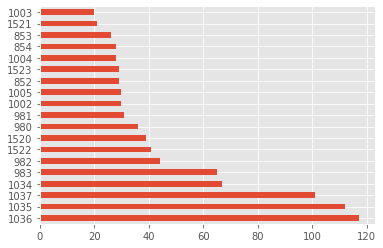

In [ ]:
#Gráfico de barras horizontais
df["LojaID"].value_counts().plot.barh()

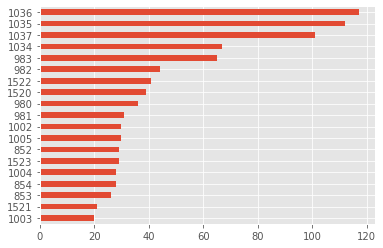

In [ ]:
#Gráfico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

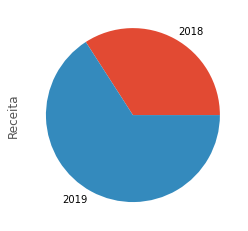

In [ ]:
#Gráfico de Pizza (A soma da Receita por ano)
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [ ]:
#Total Vendas por Cidade
df["Cidade"].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

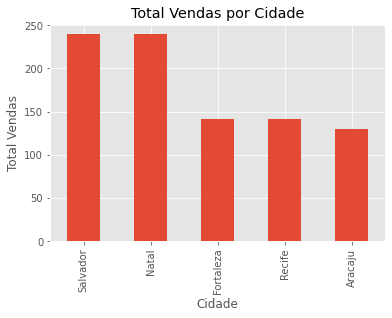

In [ ]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total Vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

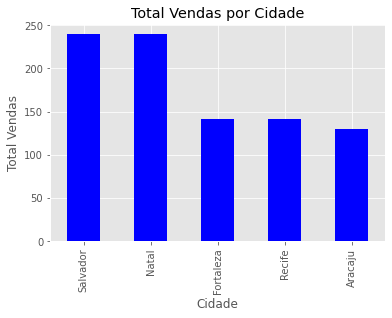

In [ ]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total Vendas por Cidade", color="blue")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [ ]:
#Alterando o estilo
plt.style.use("ggplot")

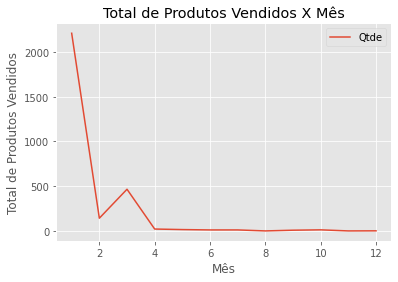

In [ ]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total de Produtos Vendidos X Mês")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos");
plt.legend();

In [ ]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano Venda"] == 2019 ] 

In [ ]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

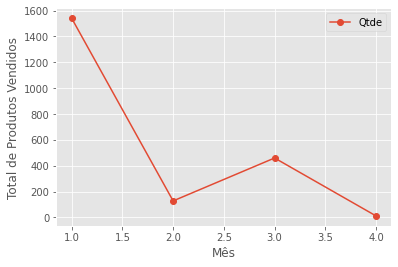

In [ ]:
#Total produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos");
plt.legend();

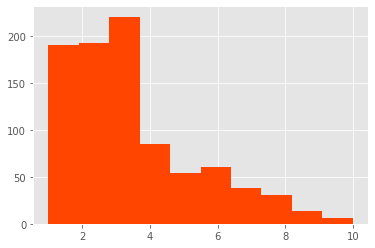

In [ ]:
#Histograma
plt.hist(df["Qtde"], color="orangered");

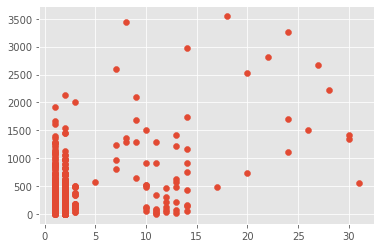

In [ ]:
#Gráfico de dispersão
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

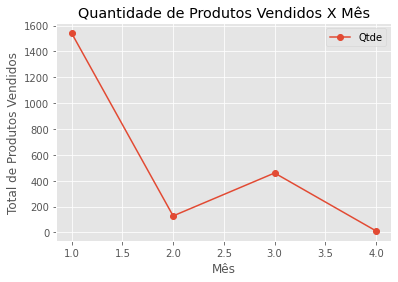

In [ ]:
#Salvando em PNG
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.title("Quantidade de Produtos Vendidos X Mês")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos")
plt.legend()
plt.savefig("Grafico Qtde x Mes.png")